In [3]:
## import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics, svm
from sklearn.metrics import accuracy_score, confusion_matrix
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
nltk.download('stopwords')

In [4]:
#load the data
data = pd.read_csv('news_articles.csv')
data = data.dropna()
data.tail()

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
2041,Matt Barber,2016-10-27T03:04:50.327+03:00,why never trumpers must reconsider,prof canoes reek of genocide white privilege c...,english,wnd.com,No Image URL,bias,Real,trump vs clinton risk vs disaster,check hillarythemed haunted house anticlinton ...,0.0
2042,Jane Chastain,2016-10-27T03:04:50.704+03:00,election crossroads socialism or capitalism,teens walk free after gangrape conviction judg...,english,wnd.com,No Image URL,bias,Real,gingrich slutshames megyn kelly,good samaritan wearing indian headdress disarm...,1.0
2043,Michael Brown,2016-10-27T03:04:54.788+03:00,reasons ill vote for trump,school named for munichmassacre mastermind ter...,english,wnd.com,http://mobile.wnd.com/files/2011/12/leftfield3...,bias,Real,youtube bans clintons black son,skype sex scam fortune built shame moroccan bo...,1.0
2044,Ann Coulter,2016-10-27T03:05:01.989+03:00,our new country women and minorities hit hardest,wars and rumors of wars russia unveils satan ...,english,wnd.com,http://www.wnd.com/files/2016/10/danney-willll...,bias,Real,wikileaks bombshells hillary need know,posted eddie skyhigh potency may scare away cr...,1.0
2045,Larry Elder,2016-10-27T03:05:05.815+03:00,trump vs clinton a risk vs a disaster,check out hillarythemed haunted house anticlin...,english,wnd.com,http://www.wnd.com/files/2015/10/Hillary-Clint...,bias,Real,fascinated sex,billion even known keeping supposedly deleted ...,0.0


<AxesSubplot: xlabel='label', ylabel='count'>

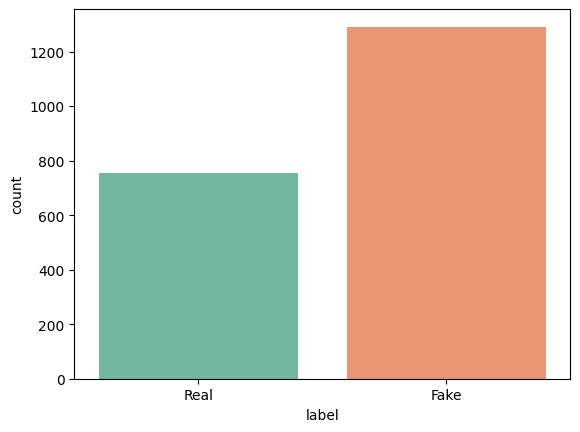

In [5]:
sns.countplot(x='label',data=data, palette= 'Set2')

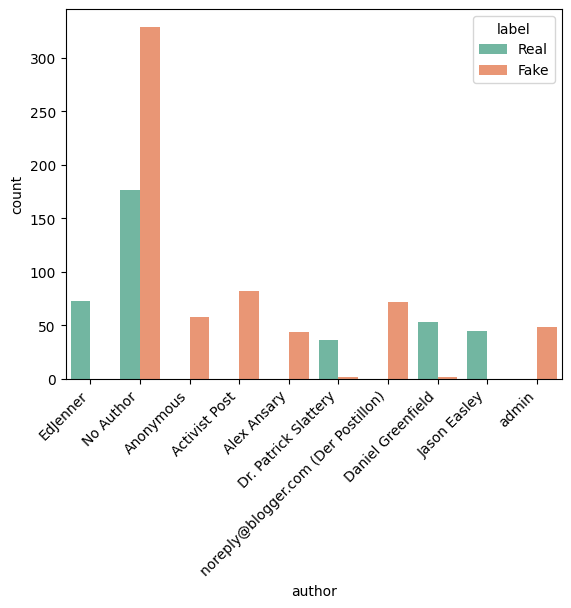

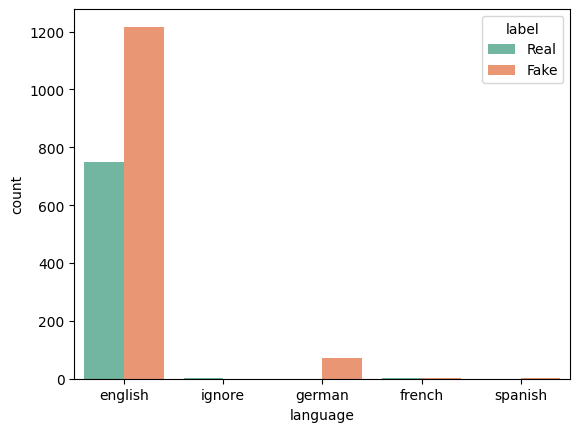

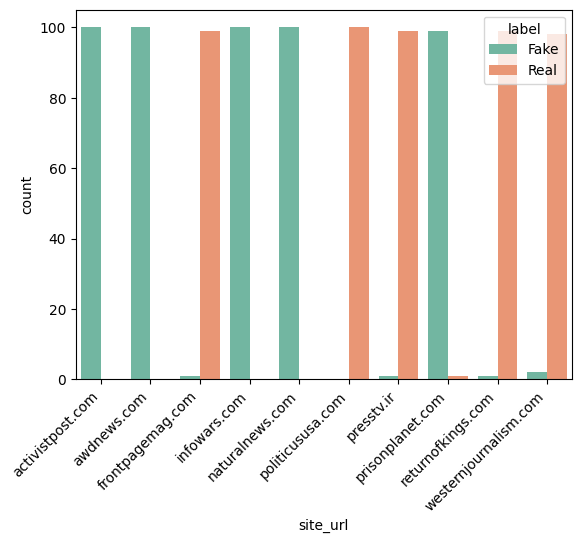

In [6]:
# Limit author and site_url to top 10
top_authors = data['author'].value_counts().head(10).index
top_sites = data['site_url'].value_counts().head(10).index

# Loop through features by our y variable to see if there is a relationship
features = ['author', 'language', 'site_url']
for f in features:
    # Set x-axis limits for author and site_url
    if f == 'author':
        ax = sns.countplot(x=f, data=data[data[f].isin(top_authors)], palette='Set2', hue='label')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    elif f == 'site_url':
        ax = sns.countplot(x=f, data=data[data[f].isin(top_sites)], palette='Set2', hue='label')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    else:
        ax = sns.countplot(x=f, data=data, palette='Set2', hue='label')
    plt.show()

In [3]:
fixed_data = data
fixed_data['label'] = fixed_data['label'].replace(['Real', 'Fake'], [1, 0])

In [4]:
fixed_data.head()

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,1,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,1,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,1,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,1,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,1,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0


In [5]:
fixed_data["processed_info"] = fixed_data["author"] + " " + fixed_data["title"] + " " + fixed_data["text"]

In [6]:
fixed_data["processed_info"].head()

0    Barracuda Brigade muslims busted they stole mi...
1    reasoning with facts re why did attorney gener...
2    Barracuda Brigade breaking weiner cooperating ...
3    Fed Up pin drop speech by father of daughter k...
4    Fed Up fantastic trumps  point plan to reform ...
Name: processed_info, dtype: object

In [7]:
def processer(content):
    stemmer = PorterStemmer()
    root_conversion = re.sub('[^a-zA-Z]',' ', content)
    root_conversion = root_conversion.lower().split()
    root_conversion = [stemmer.stem(word) for word in root_conversion if not word in stopwords.words('english')]
    return  " ".join(root_conversion)

In [8]:
fixed_data["processed_info_to_lemma"] = fixed_data["processed_info"].apply(processer)

In [9]:
fixed_data["processed_info_to_lemma"].head()

0    barracuda brigad muslim bust stole million gov...
1    reason fact attorney gener loretta lynch plead...
2    barracuda brigad break weiner cooper fbi hilla...
3    fed pin drop speech father daughter kidnap kil...
4    fed fantast trump point plan reform healthcar ...
Name: processed_info_to_lemma, dtype: object

In [15]:
X = fixed_data.processed_info_to_lemma.values
y = fixed_data.label.values

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

## 1

In [20]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
# testing the model
print(accuracy_score(y_train, model.predict(X_train)))
print(accuracy_score(y_test, model.predict(X_test)))

0.9003667481662592
0.7457212713936431


In [25]:
prediction = model.predict(X_sample)
if prediction == 1:
    print('The NEWS is Real!')
else:
    print('The NEWS is Fake!')

The NEWS is Real!


## 2

In [28]:
model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)
  
# testing the model
print(accuracy_score(y_train, model2.predict(X_train)))
print(accuracy_score(y_test, model2.predict(X_test)))

1.0
0.7995110024449877


## 3

In [33]:
model3 = PassiveAggressiveClassifier(max_iter=50)
model3.fit(X_train, y_train)

# testing the model
print(accuracy_score(y_train, model3.predict(X_train)))
print(accuracy_score(y_test, model3.predict(X_test)))

0.9981662591687042
0.8264058679706602
